# AE1 Theory and Applications of Data Analytics-->
## Abstract
The Jupyter Notebook presents an analysis of historical weather data from the Meteorological (MET) Office spanning accross 37 stations in the UK since 1854. The purpose of this analysis is to investigate weather changes over time and derive insights from the data. The dataset includes various variables such as mean daily maximum temperature(tmax), mean daily minimum temperature(tmin),days of air frost(af),total rainfall(rain),and total sunshine duration(sun).

## Keywords:
Data Analytics, Plotting, Visualization, Python, matplotlib, Jupyter Notebook,os,requests.

# Introduction

We will do a depth analysis of historical weather data collected by the Meteorological(MET) Office from 37 stations accros the UK since 1854. 
The analysis is structured into several tasks, including data-collection,pre-processing, handling, calculation of average temperature change, station rankings, identification of unexpected results, and comparison with global temperature data. Mastering PYthon programming and visualization libraries, our goal is to derive meaningful insights from the dataser and contribute to the understanding of climate trends.



# 1.Data Collection, Pre-processing and Handling -->
## 1.a Downloading the data by Web scraping 
This piece of code uses the requests library to download historical station data from the MET Office website. After defining the URL of the data page and the directory to save the downloaded files. The script sends a GET request to the URL, and if successful, it extracts the URLs of text data files from the response content. It iterates through these URLs, downloading each file using the tqdm library to display a progress bar. Overall, the script automates the storage of MET office historical station data files.

In [13]:
'''
1. Data Collection, Pre-processing and Handling (30 marks): Download the
MET historic data from all 36 weather stations in the UK. Select a monitoring
time period when your data from all your selected weather stations have been
consistently recorded. Clean the data from any special symbols, e.g. ‘*’ or ‘#’.
Visualise and handle missing data, for example by replacing any missing values
with a zero or the mean values from all stations for that year
'''
import requests 
import os
from tqdm import tqdm # just for downloading progress bar

#URL of the MET Office historic station data page
url = 'https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data'

#Directory to save downloaded files
output_dir= 'MET_Office_Data'

#Create the output directory if it doesn't exist yet
os.makedirs(output_dir,exist_ok=True)

#Send a GET request to the URL
response= requests.get(url)

#Check if the request was successful (status code 200)
if response.status_code==200:
    #Extract text data file URLs from the response content
    file_urls= [line.split('"')[1] for line in response.text.splitlines() if '.txt' in line]
                
    #After ggetting all urls of the .txt files we download them            
    for file_url in tqdm(file_urls,desc="Downloading files", unit="file"):
        #Check if the URL has a valid scheme
         if file_url.startswith(('http://','https://')):
        #Extract filename from the URL
            filename = file_url.split('/')[-1]
        #Download the file
            with open(os.path.join(output_dir,filename),'wb') as f:
                f.write(requests.get(file_url).content)
    else:
        print(f"Skipping invalid URL:{file_url}")

else:
    print("Failed to retrieve data.Status code:",response.status_code)


Skipping invalid URL:type


## 1.b Removing the Header 
This script cleans texts files in the input_dir MET_Office_Data. It iterates through each file.txt in the input directory,it reads the file's contents and determine the number of header lines based on the presence of the words "sunshine data" in line 5. It then removes the header lines and write the cleaned data to a new file in the output directory. Overall, this piece of code automates the process of removing headers from MET Office data files.

In [14]:
import os

#Directory containing the text files
input_dir = 'MET_Office_Data'

#Directory to save cleaned files
output_dir= 'NoHeader_MET_Office_Data'

#Create the output directory if it doesn't exist
os.makedirs(output_dir,exist_ok= True)

#Loop through each file in the input directory
for filename in os.listdir(input_dir):
    #check if the file is a text file
    if filename.endswith('.txt'):
        #Read the contets of the file 
        with open(os.path.join(input_dir,filename), 'r') as file:
            lines = file.readlines()

       #Determine the number of header lines
        header_length = 5 if 'sunshine data' in lines[4].lower() else 6

        #Remove header
        data = lines[header_length:]

        #Write cleaned data to a new file
        with open(os.path.join(output_dir,filename),'w') as file:
            file.writelines(data)

print("Cleaning completed.")

Cleaning completed.


# 1.c Solving second row problem
In all the files, the content of the second row is the unity of measure of the columns. The script removes the second row while retaining the first row and the all the other rows. The cleaned lines are then written back to the same file, overwriting the previous content.

In [15]:
import os

#directory containing the cleaned text files
input_dir = 'NoHeader_MET_Office_Data'

for filename in os.listdir(input_dir): #Lopping through each file
    #Chech if the file is a text file
    if filename.endswith('.txt'):
        #Read the contents of the file
        with open(os.path.join(input_dir,filename),'r')as file:
            lines= file.readlines()
        #Remove the second row(header)
        cleaned_lines = [lines[0]] #Keep the first row
        cleaned_lines += lines[2:] #Skip the second row

        #Write cleaned data back to the same file
        with open(os.path.join(input_dir,filename),'w') as file:
            file.writelines(cleaned_lines)
print("Cleaning completed")

Cleaning completed


# 1.d Converting files.txt to files.csv
This script defines a function convert_txt_to_csv(), which converts text files with fixed-width formatting to CSV files. For each text file, it reads the content into a pandas DataFrame using read_fwf(), then saves the DataFrame to a CSV file with the same name in the output folder. This code efficiently automates the conversion process.

In [16]:

#Assign directory with tilde(~)
import os
import pandas as pd

def convert_txt_to_csv(input_folder, output_folder):
    #Make syre the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    #Loop through all text files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".txt"):
            input_filepath= os.path.join(input_folder,filename)
            output_filepath = os.path.join(output_folder,os.path.splitext(filename)[0]+".csv")

            #Read the fixed-width format file
            df= pd.read_fwf(input_filepath)
            #Save the DataFrame to a CSV file
            df.to_csv(output_filepath, index=False)

#Usage of convert_txt_to_csv()
input_folder = 'NoHeader_MET_Office_Data'
output_folder = 'DataAE1.CSV'
convert_txt_to_csv(input_folder,output_folder)

# 1.e Replacing '---' entries with 0.
This code loops through all CSV files in the input directory, reads each file into a DataFrame, performs the replacement operation, and saves the modified DataFrame to a new CSV file in the output directory.

In [17]:
import pandas as pd

#Directory containing CSV files
input_directory = 'DataAE1.csv'
#Directory to save modified CSV files
output_directory = 'DataAE1csv.cleaned'

#Create the output directory if it doesn't exist
os.makedirs(output_directory,exist_ok= True)

#Loop through all CSV files in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):
        input_filepath=os.path.join(input_directory,filename)
        #Read CSV file into DataFrame
        df=pd.read_csv(input_filepath)
        #Replace '---' with 0
        df.replace('---',0,inplace=True)
        #Save modified DataFrame to a new CSV file in the output directory
        output_filepath= os.path.join(output_directory,f'cleaned_{filename}')
        df.to_csv(output_filepath,index=False)


# 1.f Selecting the time period 1996-2022
This code processes cleaned CSv files by filtering data from the period between 1996 and 2022. Giving a glance to the data, we have choosen this period to be sure that all the 37 stations have been constantly recorded from that year. It defines a function, read_cleaned_data(),to preprocess the data by converting the'yyyy'column to numeri(since we have to compare it), handling non numeric values as NaN, dropping rows with NaN values in the 'yyyy'column and converting 'yyyy'to integer.
After that we iterate through each CSV files, filters it to the specified period , and saves the filtered data to a new directory. This process ensures that only relevant data are kept for further analysis.

In [18]:
#Selecting the period between 1996-2022
import pandas as pd
import os
#Directory containing all CSV files
input_directory='DataAE1csv.cleaned'
output_directory='Filtered_DataAE1csv.cleaned'
#Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

#Function to read and preprocess data
def read_cleaned_data(file_path):
    df= pd.read_csv(file_path)
    #conver 'yyyy' column to numeric,coerce non-numeric values to Nan
    df['yyyy'] = pd.to_numeric(df['yyyy'],errors='coerce')
    #Drop rows with NaN values in 'yyyy' column
    df= df.dropna(subset=['yyyy'])
    #Convert 'yyyy' column to integer
    df['yyyy']= df['yyyy'].astype(int)
    return df


#Iterate through each file to filter data and save
for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):
        station_data= read_cleaned_data(os.path.join(input_directory,filename))
        #filter data for the period between 1996 and 2022
        filtered_data= station_data[(station_data['yyyy']>=1996)&(station_data['yyyy']<=2022)]
        # Save filtered data to a new directory
        filtered_data.to_csv(os.path.join(output_directory,filename),index=False)



# 1.g Finding Inconsistency in data observations
This script identifies inconsistencies in the filtered CSV files by ensuring each file contains exactly 324 rows, corresponding to a 27-year period with 12 observation per year(12*27=324). It defines a function , count_observations(), to count the number of lines in each file, subtracting one for the header. The script iterates through each CSV file, checks if it contains 324 observations, and copies the consistent files to a new directory. It prints a message indicating the filename, in case of any inconsistency is found. We save only consistent data into a new directory Final_ConsistentStation_DataAE1csv.cleaned which is the one where we will perform data analysis.

In [19]:
#Finding inconsistency
import os

import shutil
#Directory containing all filtered CSV files
filtered_directory= 'Filtered_DataAE1csv.cleaned'
output_directory='Final_ConsistentStation_DataAE1csv.cleaned'
#Crete the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

#Function to check consistency of data
def count_observations(filepath):
    with open(file_path) as f:
     #Count the numer of lines in the file
        num_lines= sum(1 for line in f)
    #SUbtract 1 for the header line
    return num_lines-1

#Iterate through each file to check consistency and save consistent ones
for filename in os.listdir(input_directory):
    if filename.endswith('.csv'):
        file_path= os.path.join(filtered_directory,filename)
        #Count observations in the file
        num_observations=  count_observations(file_path)
        
        #Check consistency
        if num_observations==324:
            #If consisten,save to new directory
            shutil.copy(file_path, os.path.join(output_directory,filename))
        else:
            #If inconsistent, print a messagge
            print(f'inconsistent data found in :{filename} has only {num_observations}rows')

inconsistent data found in :cleaned_cwmystwythdata.csv has only 183rows
inconsistent data found in :cleaned_southamptondata.csv has only 51rows
inconsistent data found in :cleaned_ringwaydata.csv has only 106rows


# 2 Average Temperature Change
The following code shows how to calculate the Average Temperature Change and plots a trend graph. it follows those steps:
* Loading Station Data: the scirpt iterates through each file and extracts the station name from the filename and reads the CSV file into a DataFrame using Pandas. Temperature columns ('tmax' and 'tmin') are converted to numeric types
* Calculate Average Temperature Change: For each station, the script computes the average change over the observation period. It calculates the percentage change for both maximum and minimum temperature and averages the to obtain the overall temperature change.
* Identyfying Extremes: After computing the average temperature chages for all stations, the script determines which station experienced the greatest increase and which one had the lowes change
* Visualizing temperature Trends: the script generates a grid of subplots to visualize temperature trends for each station over time.
* Displaying Result:the script displays the plot showing temperature trends for all stationds and prints out the names of the staitons with the greatest and lowest average temperature changes.

/var/folders/c7/s4b91brd5951stsg2n86bh500000gn/T/ipykernel_93510/1725980910.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  avg_change_tmax=((final_tmax-initial_tmax)/initial_tmax)*100
/var/folders/c7/s4b91brd5951stsg2n86bh500000gn/T/ipykernel_93510/1725980910.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  avg_change_tmin=((final_tmin-initial_tmin)/initial_tmin)*100


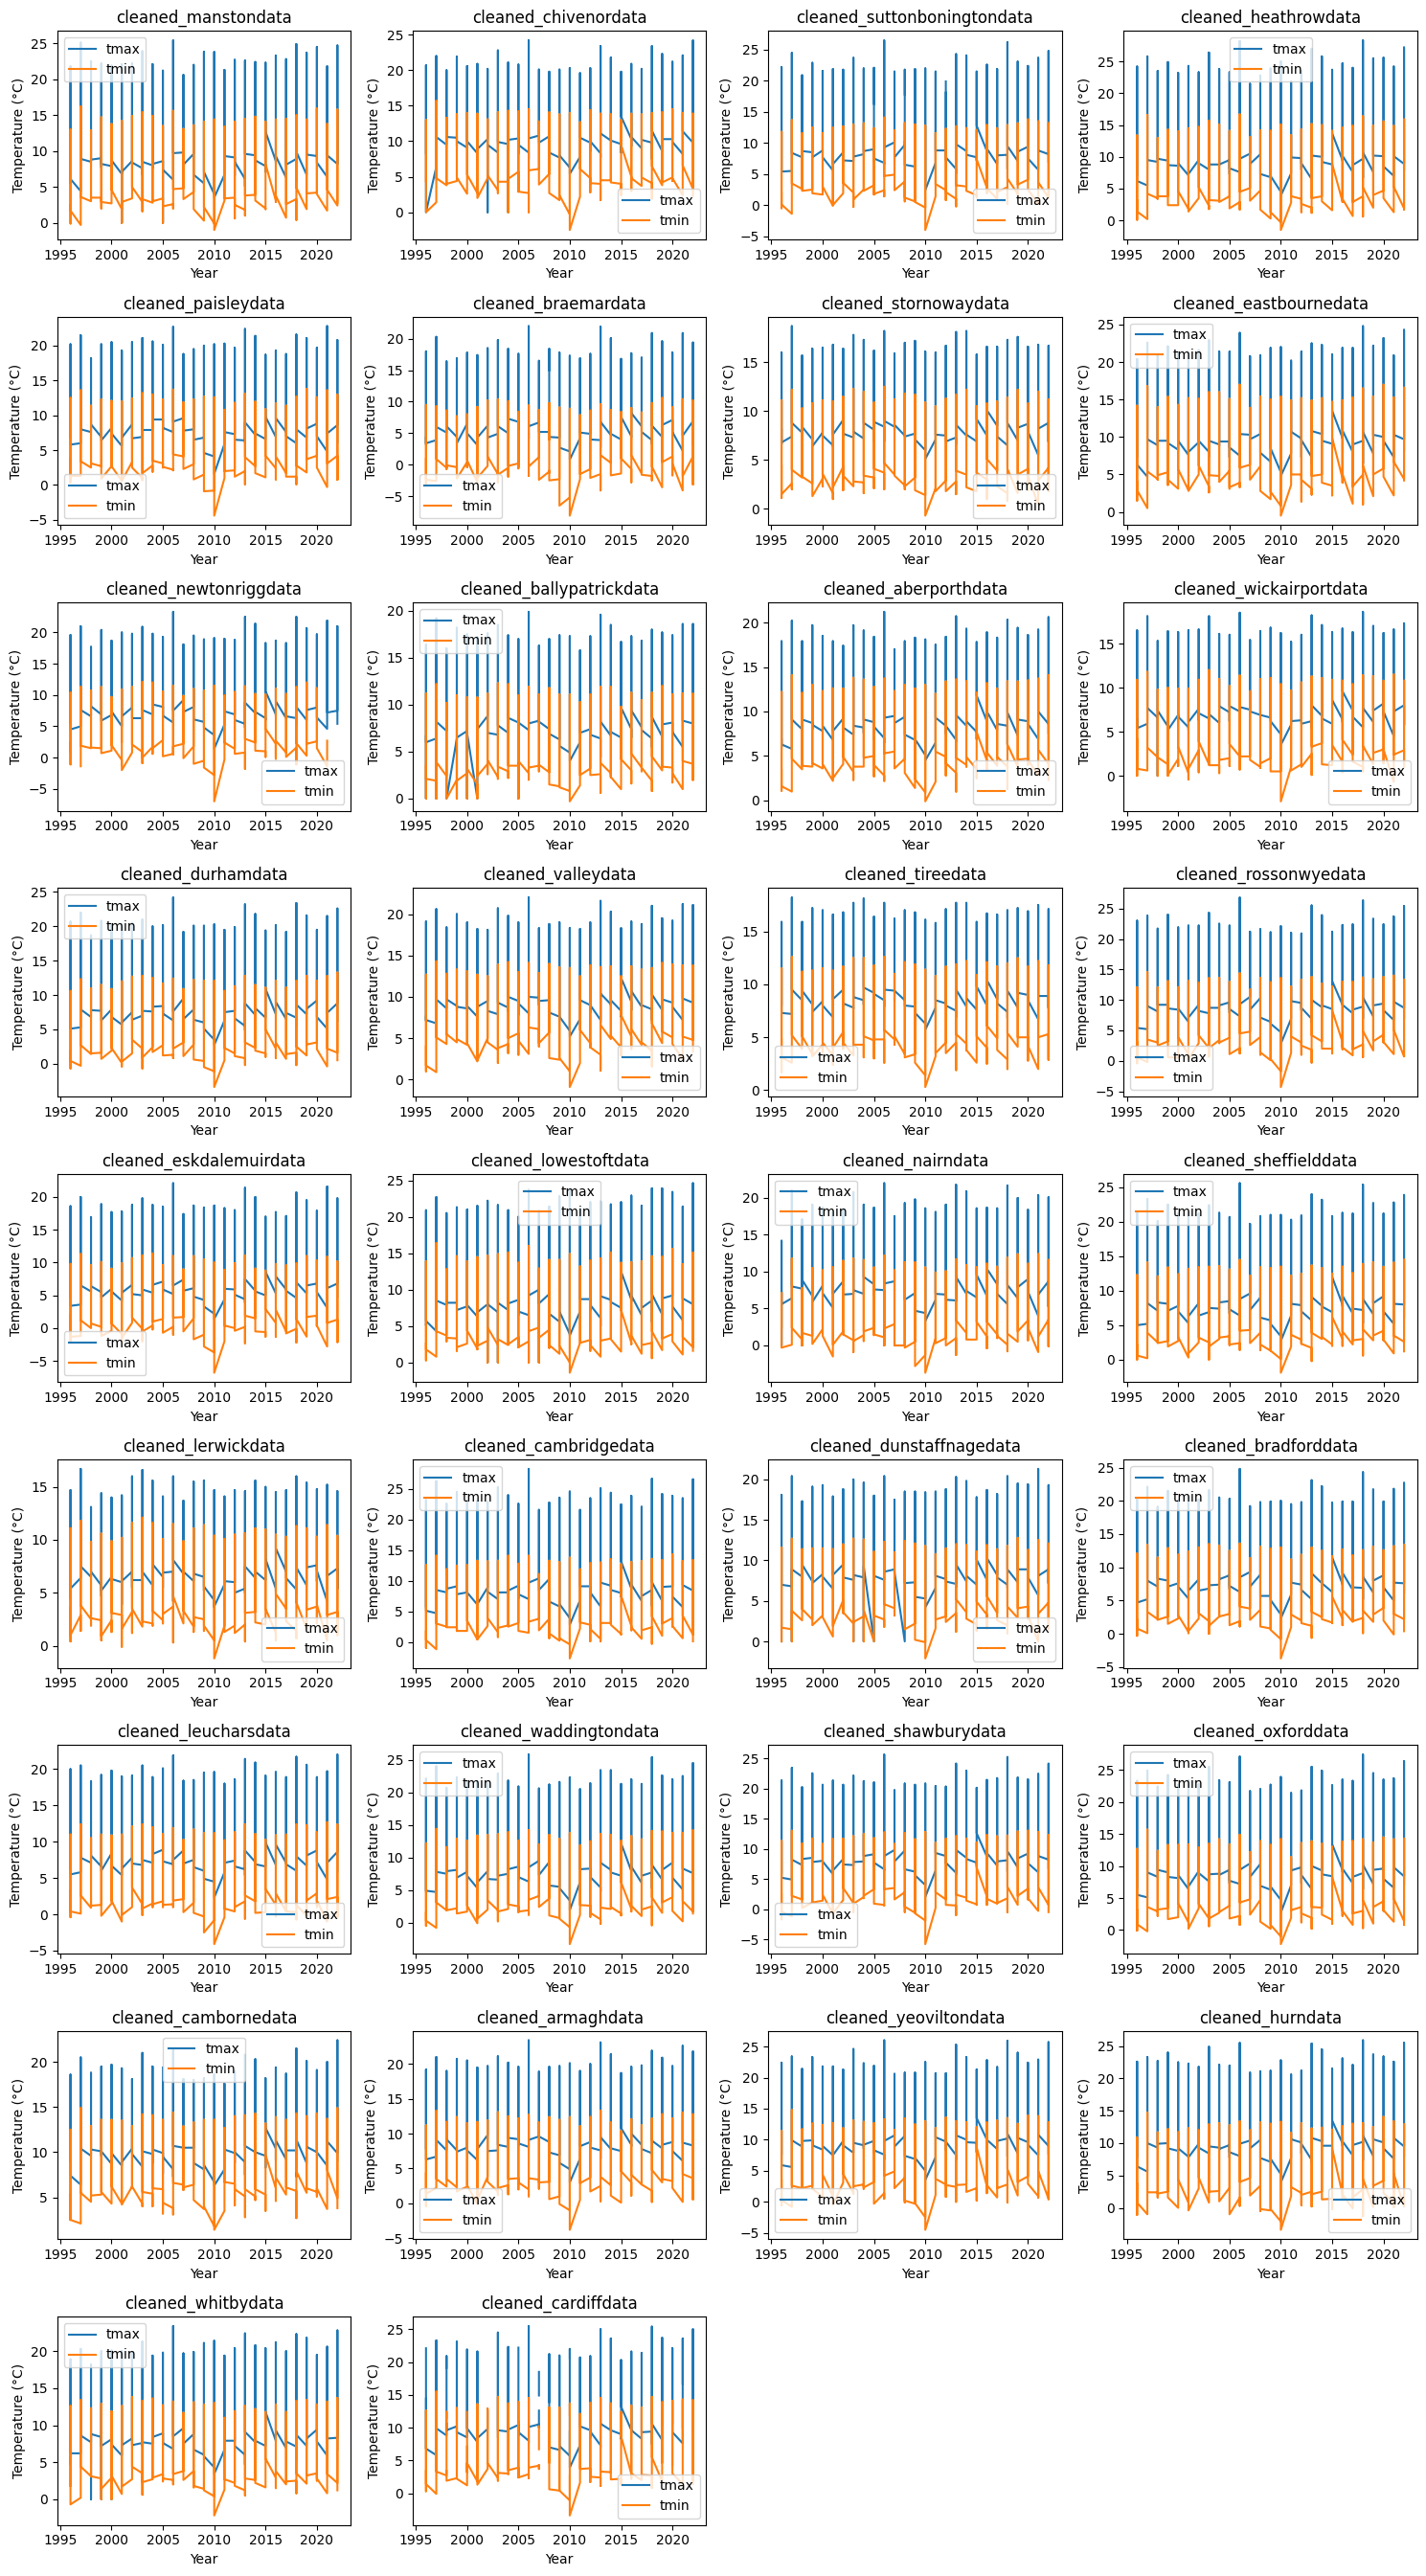

Station with greatest average temperature change: cleaned_dunstaffnagedata
Station with lowest average temperature change: cleaned_braemardata


In [20]:
'''
part 2 Average Temperature Change (15 marks): Calculate for each station the
average temperature change to date as a percentage increase or decrease.
Determine the station with the greatest and lowest average temperature changes
and visualise the results over time using an appropr§iate plot.
'''
import os
import pandas as pd 
import matplotlib.pyplot as plt

#Directory containing station data files
data_dir = 'Final_ConsistentStation_DataAE1csv.cleaned'

#Load station data into a dictionary of dataframes
station_data={}
for filename in os.listdir(data_dir):
    station_name= os.path.splitext(filename)[0]
    filepath= os.path.join(data_dir,filename)
    df= pd.read_csv(filepath)
    #Convert temperature columns to numeric types
    df['tmax']= pd.to_numeric(df['tmax'],errors='coerce')
    df['tmin']=pd.to_numeric(df['tmin'],errors='coerce')
    station_data[station_name]=df

#Now we Calculate average temeperature change for each station
station_avg_changes={}
#Loop through all stations
for station_name,df in station_data.items():
    #Initial maximum temperature 
    initial_tmax= pd.to_numeric(df.iloc[0]['tmax'],errors= 'coerce')
    #Final maximum temperature
    final_tmax= pd.to_numeric(df.iloc[-1]['tmax'],errors='coerce')
    #Initial minimum temperature
    initial_tmin= pd.to_numeric(df.iloc[0]['tmin'],errors='coerce') 
    #Final minimum temperatur
    final_tmin= pd.to_numeric(df.iloc[-1]['tmin'],errors='coerce')
    #Calculate percentage change
    avg_change_tmax=((final_tmax-initial_tmax)/initial_tmax)*100  
    #Calculate percentage change for tmin
    avg_change_tmin=((final_tmin-initial_tmin)/initial_tmin)*100 
    #Average temperature change
    avg_change= (avg_change_tmax + avg_change_tmin) / 2 
    station_avg_changes[station_name]= avg_change

#Determine station with greatest and lowest average temperature changes
max_change_station= max(station_avg_changes,key= station_avg_changes.get)
min_change_station= min(station_avg_changes,key=station_avg_changes.get)

#Visualize temperature change trends over time for each station
num_stations= len(station_data)
num_cols= 4 #number of columns in the subplot grid
num_rows= -(-num_stations//num_cols) #Number of rows(ceiling division)

fig,axs= plt.subplots(num_rows,num_cols,figsize=(15,num_rows*3))

for i, (station_name,df) in enumerate(station_data.items()):
    row= i//num_cols
    col= i%num_cols
    axs[row,col].plot(df['yyyy'],df['tmax'],label='tmax')
    axs[row,col].plot(df['yyyy'],df['tmin'],label='tmin')
    axs[row,col].set_title(station_name)
    axs[row,col].set_xlabel("Year")
    axs[row,col].set_ylabel("Temperature (°C)")
    axs[row,col].legend()

#Hide empty subplots
for i in range(len(station_data),num_rows* num_cols):
    row = i // num_cols 
    col= i%num_cols
    axs[row,col].axis('off')

plt.tight_layout()
plt.show()

print("Station with greatest average temperature change:",max_change_station)
print("Station with lowest average temperature change:",min_change_station)


# 3 Station Rankings
This code aims to rank stations based on their highest recorded temperatures and summarize the temperatuer distribution for the top-k stations. It first loads station data from CSV files into a dictionary of DataFrames, converting temperature columns to numeric types. Then, it extracts the maximum temperature for each station and ranks them in descending order based on this value. After that, it selects the top-k station and plots their temperature distribusions using histograms. The plot provides insights into the distribution of maximum temperatures across these stations. The script also calculates and prints statistics such as mean, median, and standard deviation for each station's temperature distribution, offering further insights into their temperature characteristics.


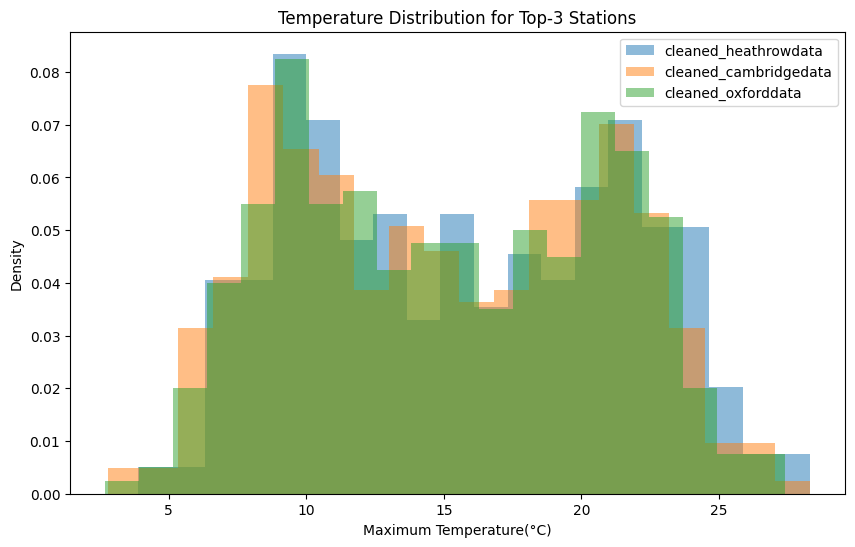

Station: cleaned_heathrowdata
Mean Temperature: 15.783024691358026
Median Temperature: 15.6
Standard Deviation: 5.789463215305014

Station: cleaned_cambridgedata
Mean Temperature: 15.00864197530864
Median Temperature: 14.7
Standard Deviation: 5.763812539644615

Station: cleaned_oxforddata
Mean Temperature: 15.187345679012347
Median Temperature: 14.95
Standard Deviation: 5.613522516034901



In [21]:
'''
Part 3:Station Rankings (15 marks): Rank the stations in descending order based on
the highest temperature. Summarise the temperature distribution in an
appropriate plot, including measures of central tendency and variance, for the
top-k stations
'''
import os
import pandas as pd
import matplotlib.pyplot as plt

#Directory containing station data files
data_dir='Final_ConsistentStation_DataAE1csv.cleaned'

#Load station data into a dictionary of DataFrames
station_data = {}
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        station_name=os.path.splitext(filename)[0]
        filepath= os.path.join(data_dir,filename)
        df= pd.read_csv(filepath)
        #Convert temperature columns to numeric types
        df['tmax']=pd.to_numeric(df['tmax'],errors='coerce')
        station_data[station_name]=df

#Extract the maximum temperature for each station
station_max_temps = {station: df['tmax'].max() for station, df in station_data.items()}

#Rank stations based on highest temperature

ranked_stations = sorted(station_max_temps, key= station_max_temps.get, reverse= True)

#Top-k stations
top_k = 3 #Change this value as needed
top_k_stations = ranked_stations[:top_k]
#Plot temperature distribution for top-k stations
plt.figure(figsize=(10,6))
for station in top_k_stations:
    plt.hist(station_data[station]['tmax'],bins=20,alpha=0.5,label=station,density= True)

plt.xlabel("Maximum Temperature(°C)")
plt.ylabel("Density")
plt.title("Temperature Distribution for Top-{} Stations".format(top_k))
plt.legend()
plt.show()
#Summarize temperature distribution statistics for top-K stations
for station in top_k_stations:
    temp_data = station_data[station]['tmax']
    mean_temp= temp_data.mean()
    median_temp= temp_data.median()
    std_temp= temp_data.std()
    print("Station:",station)
    print("Mean Temperature:",mean_temp)
    print("Median Temperature:",median_temp)
    print("Standard Deviation:",std_temp)
    print()

# 4.a Surprising Results
The script aims to find any surprising or unexpected results in temperature data. It first loads data from CSV files into a dictionary of DataFrames, converting temperature columns to numeric types. Then, it calculates temperature anomalies using z-scores((df['tmax']-df['tmax'].mean())/df['tmax'].std()), where std() is the standard deviation(), for maximum temperatures, identifying years with unusually high values.

In [22]:
''' Surprising Results (20 marks): Identify any surprising or unexpected results in
the temperature data. For example, has any station reported an unusually larger
number of higher temperatures in any given year? Discuss the limitations of
these findings in the context of climate change.
'''
import os 
import pandas as pd
import matplotlib.pyplot as plt

#Directory containing station data files
data_dir = 'Final_ConsistentStation_DataAE1csv.cleaned'

#Load station data into a dictionary of DataFrames
station_data = {}
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        station_name=os.path.splitext(filename)[0]
        filepath= os.path.join(data_dir,filename)
        df= pd.read_csv(filepath)
        #Convert temperature columns to numeric types
        df['tmax']=pd.to_numeric(df['tmax'],errors='coerce')
        df['tmin']=pd.to_numeric(df['tmin'],errors='coerce')
        station_data[station_name]=df

#Identify anomalie in temperature data
anomalies={}
for station_name, df in station_data.items():
    #Calculate temperature anomalies(e.g, differences from the mean or z-scores)
    #Here,we'll calculate z-scores for maximum temperatures
    z_scores=(df['tmax']-df['tmax'].mean())/df['tmax'].std()
    #Identify years with unusually high z-scores (threshold can be adjusted)
    anomaly_years= df.loc[z_scores>2,'yyyy']
    anomalies[station_name]= anomaly_years

#Discuss limitations in the context of climate change
for station_name, anomaly_years in anomalies.items():
    if not anomaly_years.empty:
        print("Station:",station_name)
        print("Years with Unusual High Temperatures",anomaly_years.tolist())
        print("Limitations:")
        print("-anomalies may result from various factors like data errors, equipment malfunctions, or short-term weather events.")
        print("-Isolated anomalies in specific years of stations do not necessarily indicate broader climate change trends.")
        print("-Long-term climate analysis requires robust datasets, considering factors like urbanization,station relocation, and data quality.")
        print("-Climate change impacts often happen as gradual shifts or changes in extreme events over extend periods.")
        print("-Anomalies should prompt further investigation rather than immediate conclusions about climate change.")
        print()

Station: cleaned_chivenordata
Years with Unusual High Temperatures [2006, 2022]
Limitations:
-anomalies may result from various factors like data errors, equipment malfunctions, or short-term weather events.
-Isolated anomalies in specific years of stations do not necessarily indicate broader climate change trends.
-Long-term climate analysis requires robust datasets, considering factors like urbanization,station relocation, and data quality.
-Climate change impacts often happen as gradual shifts or changes in extreme events over extend periods.
-Anomalies should prompt further investigation rather than immediate conclusions about climate change.

Station: cleaned_suttonboningtondata
Years with Unusual High Temperatures [2006, 2018]
Limitations:
-anomalies may result from various factors like data errors, equipment malfunctions, or short-term weather events.
-Isolated anomalies in specific years of stations do not necessarily indicate broader climate change trends.
-Long-term climate a

# 4.b Brief discussion
As explained in the prints, the identified anomalies, such as unusually high temperature in specific years, may be attributed to factors like data errors, equipment malfunctions, or short-term weather patterns. Isolated anomalies in those years do not reflect climate change trends. Long-term climate analysis requires strong datasets, considering factors like urbanization, station relocation and data quality. Climate change consequences usually manifest as gradual shifts or changes in extreme events over long periods, so we need to be careful and we need to investigate more before drawing conclusions solely based on anomalies.

# 5 Comparison with other Sources

Comparison with Other Sources (20 marks): Compare the similarities or
differences between the annual average temperature in the UK, as reported by
the MET Office, and the world annual average temperature data from other
sources such as NASA, the National Oceanic and Atmospheric Administration
(NOAA), or the World Meteorological Organization (WMO). Discuss the
implications and reliability of comparing data from different sources.

# Discussion

## Introduction
The comparison between annual average temperatures reported by the UK's MET Office and global datasets from major important sources like NASA, NOAA, or WMO offers a clear understanding of climate trends at both local and global scale. MET Office provides information on a region-specific data for the UK meanwhile, international agencies like NASA, NOAA, and WMO offer a wider perspective on climate variations worldwide. 

* ## Similarities

At their core, all these organizations share the common goal of monitoring and analyzing long-term climate trends. Whether it's the MET Office focusing on the UK or global agencies like NASA, NOAA, and WMO, each employs advanced measurement techniques and rigorous quality control procedures to ensure the accuracy and reliability of their datasets. So the fundamental objective remains consistent: to provide comprehensive and credible climate information to support decision-making and policy formulation.

* ## Differencies

However, differences emerge in the spatial coverage, measurement methodologies, and data processing techniques emplyed by these organizations. The MET Office's data primarily captures the complexity of the UK's climate, offering insights into local variations and
trends. In contrast, global datasets collect data from numerous monitoring stations around the world, offering a panoramic view of climate patterns accross continents and oceans. Furthermore, inequalities may arise due to variations in instrumentation, calibration protocols, and different time resolutions across datasets, when comparing localized and global climate data.

* ## Implications:

A comparison data from the MET Office with global datasets can discover reginal climate anomalies and reveal localized climatic influences within the broader context of global climate change. Discrepancies observed between the UK's annual average temperature and global averages may signify regional climatic factors or exceptional weather events. Understanding these disparities is crucial for informing policymaker, researchers, and stakeholders about the drivers of climate variability and following the development of  mitigation and adaptation strategies in local contexts.

* ## Reliability and Challenges

While comparing data from multiple sources enriches our understanding of climate dynamics, it also presents challenges in terms of data compatibility, homogeneity and consistency. Variations is measurement techniques, temporal resolutions, and spatial coverages can create biases and inconsistencies, complicating direct comparisons. Moreover, differences in data processing algorithms and quality control procedures may lead to leack in trend detection and interpretation.

To avoid those problems, robust validation and intercomparison pratices are essential.
By evaluating the similarities and differences between datasets and finding systematic biases, stakeholders can enhance the reliability of cross-referenced climate data. CLear documentation of data processing methodologies, metadata standards, and uncertainty estimates further fosters trus and facilitates cross-referencing between differen sources.

* ## Conclusion:

In conclusion, comparing annual average temperature data from the MET Office with global datasets from organizations like NASA, NOAA, and WMO offers valuable insights into regional climate variations within the larger context of global climate change. Even though similarities exist in their objectives and commitment to data quality,differences in spatial coverage, measurement techniques, and data processing methodologies necessitate careful interpretation and validation. WIth the knowledge of these disparities and implementig strong validation procedures, stakeholders can increase the reliability of cross-referenced climate data and make informed decisions in climate related policy and planning.

This analysis emphasizes the importance of collaborative efforts and transparent communication among climate organizations to ensure the accuracy and credibility of climate data. It underscores the need for interpretation and validation when comparing climate data from different sources, highlighting the difficulties inherent in understanding climate variability and change.


